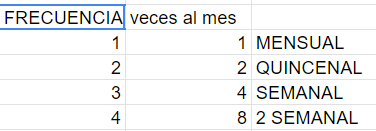

#Clustering de puntos de promotoria Comeverde
###Optimización determinista
Melanie Astrid Montaño Ramos   A01643711

Karla Rebeca Munguía Romero   A01741255

Gabriel Eduardo Meléndez Zavala   A01638293

Guillermo Villegas Morales A01637169


Importar librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Base de datos con puntos de promotoría

In [3]:
csv_data = """
Tienda, ID, Long, Lat
LA COMER SUMESA CENTENARIO, 0, -99.16303649999999, 19.3576604
NUTRISA PORTAL SAN ANGEL, 1, -99.1897619, 19.3610905
NUTRISA CHED PICACHO, 2, -99.21849089999999, 19.2871707
NUTRISA SATELITE 2, 3, -99.2338814, 19.5103999
NUTRISA CHED POLANCO, 4, -99.2064357, 19.4421781
NUTRISA PLAZA LORETO, 5, -99.19453879999999, 19.3398663
NUTRISA PLAZA LINDAVISTA, 6, -99.13358459999999, 19.4915432
NUTRISA ENCUENTRO TLANEPANTLA, 7, -99.1727746, 19.532159
NUTRISA UNIVERSIDAD, 8, -99.181451, 19.341832
NUTRISA ASTURIAS MEGA COM MEX, 9, -99.1328563, 19.407595
LA COMER 305 CITY MARKET INTERLOMAS, 10, -99.2721593, 19.406649
LA COMER 55 LA COMER VILLA COAPA, 11, -99.1259867, 19.3049903
NUTRISA TOWN CENTER EL ROSARIO, 12, -99.2031398, 19.5030887
NUTRISA ANTARA, 13, -99.2047028, 19.4390998
NUTRISA LAS AMERICAS ECATEPEC, 14, -99.02396, 19.583527
NUTRISA PATIO UNIVERSIDAD, 15, -99.1670698, 19.3657147
CHEDRAUI 814 SUPER CHEDRAUI SELECTO WTC 10-22 SEARS, 16, -99.17298869999999, 19.393856
LA COMER 127 LA COMER TULTITLAN, 17, -99.08043599999999, 19.6665407
NUTRISA GALERIAS INSURGENTES, 18, -99.1791971, 19.3712702
LA COMER 377 CITY MARKET LOMAS, 19, -99.21469739999999, 19.41879
NUTRISA WM TLALPAN, 20, -99.1411184, 19.380356
NUTRISA PLAZA TLALNEPANTLA PB, 21, -99.2054276, 19.5373206
LA COMER 376 FRESKO TECAMACHALCO, 22, -99.23815890000002, 19.421515
NUTRISA PLAZA DE LAS ESTRELLAS 1, 23, -99.1711742, 19.4353234
LA COMER FRESKO VALLARTA, 24, -99.24941249999999, 19.5040741
LA COMER 446 FRESKO SATELITE, 25, -99.2327036, 19.5093508
NUTRISA PLAZA MILENIUM, 26, -99.1943555, 19.55225859999999
NUTRISA MADERO, 27, -99.1369894, 19.4338062
CHEDRAUI 655 CHEDRAUI SELECTO MEXICO TECAMACHALCO 11-12, 28, -99.2509542, 19.4113243
NUTRISA GRAN TERRAZA COAPA, 30, -99.12713819999999, 19.29373379999999
NUTRISA TORRES LINDAVISTA, 31, -99.1442316, 19.5109537
NUTRISA PLAZA IZCALLI, 32, -99.1968977, 19.6498389
NUTRISA PLAZA CENTELLA, 33, -99.1484594, 19.6796472
NUTRISA ISABEL LA CATOLICA, 34, -99.13658199999999, 19.4321465
LA COMER 239 SUMESA ARBOLEDAS, 35, -99.2198602, 19.5599264
NUTRISA PERINORTE, 36, -99.19166899999999, 19.602497
NUTRISA TAPO, 37, -99.112241, 19.430242
NUTRISA 16 DE SEPTIEMBRE, 38, -99.13542179999999, 19.4323677
NUTRISA PABELLON POLANCO, 39, -99.2070395, 19.4375999
NUTRISA CHED COAPA, 40, -99.11892979999999, 19.3021465
NUTRISA PORTAL CENTRO, 41, -99.13016089999999, 19.4174851
NUTRISA GRAN TERRAZA LOMAS VERDES, 42, -99.24702529999999, 19.4958151
LA COMER 12 LA COMER VALLE DORADO, 43, -99.20994669999999, 19.5514654
NUTRISA GALERIAS COAPA 2, 44, -99.1231385, 19.3027854
NUTRISA PLAZA JUAREZ, 45, -99.1432129, 19.4343519
NUTRISA PLAZA SAN ESTEBAN, 46, -99.23379399999999, 19.4586913
LA COMER 435 FRESKO LA HERRADURA, 47, -99.2494959, 19.411313
LA COMER 431 LA COMER DEL VALLE, 48, -99.1672455, 19.3754266
CHEDRAUI 158 CHEDRAUI MEXICO PLAZA AMERICAS 07-12, 49, -99.1351493, 19.3130867
NUTRISA TOWN CENTER NICOLAS ROMERO, 50, -99.292587, 19.626655
NUTRISA WM PLATEROS, 51, -99.1952409, 19.3575148
NUTRISA PLAZA FORTUNA, 52, -99.1345586, 19.4848332
LA COMER 14 LA COMER LOMAS ANAHUAC, 53, -99.27470840000001, 19.3993649
NUTRISA LA CUSPIDE LOMAS VERDES, 54, -99.266536, 19.514746
NUTRISA PASEO ACOXPA, 55, -99.1370451, 19.2986818
NUTRISA MULTIPLAZA OJO DE AGUA TECAMAC, 56, -99.0180881, 19.665998
NUTRISA CENTRAM 4 CAMINOS PROPIA, 57, -99.215527, 19.458156
LA COMER 231 SUMESA POLANCO, 58, -99.19689509999999, 19.4308628
NUTRISA PLAZA COACALCO, 59, -99.0817575, 19.6269134
NUTRISA SENDERO ECATEPEC, 60, -98.995638, 19.619319
CHEDRAUI 231 CHEDRAUI SELECTO MEXICO INTERLOMAS 04-05, 61, -99.2819658, 19.3929147
NUTRISA PLAZA EXHIBIMEX, 62, -99.1918946, 19.3896383
NUTRISA AMPLIACION SANTA FE, 63, -99.27599, 19.361006
NUTRISA PAPALOTE MUSEO DEL NINO, 64, -99.1946036, 19.4118823
NUTRISA CM SAN MIGUEL, 65, -99.2143589, 19.688794
LA COMER 403 CITY MARKET PLAZA CARSO, 66, -99.203178, 19.4430126
NUTRISA SANTA FE 3, 67, -99.2735343, 19.3613046
NUTRISA PARQUE DELTA, 68, -99.15379689999999, 19.4030111
NUTRISA PLAZA INSURGENTES, 69, -99.165818, 19.412603
NUTRISA TOWN CENTER ZUMPANGO, 70, -99.05412899999999, 19.78907239999999
NUTRISA PERISUR 3, 71, -99.19194499999999, 19.3041071
NUTRISA P. GRAN SUR, 72, -99.16572099999999, 19.305023
LA COMER 235 SUMESA VALLE, 73, -99.15963509999999, 19.3940851
NUTRISA PLAZA UNIVERSIDAD, 74, -99.1659742, 19.3670932
CHEDRAUI 805 SUPER CHEDRAUI SELECTO PARQUE DURAZNOS 08-22, 75, -99.2425516, 19.4026912
LA COMER 238 SUMESA SAN   NGEL, 76, -99.1901245, 19.3483772
NUTRISA CHED MUNDO E, 78, -99.2283391, 19.5251974
NUTRISA PABELLON RIO DE LOS REMEDIO, 79, -99.108302, 19.5183293
NUTRISA PLAZA CRYSTAL ATIZAPAN, 80, -99.24506679999999, 19.5624447
NUTRISA PLAZA CARSO, 81, -99.2038367, 19.44176359999999
NUTRISA LAGO DE GUADALUPE, 82, -99.21314, 19.58011
NUTRISA PERISUR 1, 83, -99.18834770000001, 19.3041453
NUTRISA REFORMA 222, 84, -99.1612097, 19.4284672
WALMART 2466 SC CUITLAHUAC, 85, -99.1645645, 19.4712181
CHEDRAUI 161 SUPER CHEDRAUI MEXICO BELLAVISTA, 86, -99.2510257, 19.5209011
NUTRISA COM MEX M.A.Q., 87, -99.17173609999999, 19.3452895
LA COMER 17 LA COMER TLALPAN, 88, -99.17922000000002, 19.2889113
NUTRISA ESTACION TRANS CD AZTECA PA, 89, -99.02681000000001, 19.534499
NUTRISA PORTAL VALLEJO, 90, -99.1442388, 19.468113
NUTRISA LAS FLORES COACALCO, 91, -99.0964103, 19.63549009999999
NUTRISA PATIO CLAVERIA, 92, -99.18175439999999, 19.4638264
NUTRISA MULTIPLAZA LAS ALAMEDAS, 93, -99.2419326, 19.552015
LA COMER 402 FRESKO JESUS DEL MONTE, 94, -99.2933213, 19.3888474
CHEDRAUI 109 SUPER CHEDRAUI SELECTO INTERLOMAS HILLS 08-19, 95, -99.2819658, 19.3929147
NUTRISA GUADLAJARA 53, 96, -99.1725053, 19.4184277
NUTRISA PATIO ECATEPEC, 97, -99.04630429999999, 19.6041196
CHEDRAUI 816 SUPER CHEDRAUI COSMOPOL COACALCO 10-22, 98, -99.12324989999999, 19.6321549
CHEDRAUI 815 SUPER CHEDRAUI SELECTO ATIZAPAN 11-22, 99, -99.2746243, 19.5478254
LA COMER 230 SUMESA COLIMA, 100, -99.1581559, 19.4204687
NUTRISA GRAN PATIO TLALPAN, 101, -99.17601200000001, 19.284099
LA COMER 229 SUMESA MIER Y PESADO, 102, -99.16568699999999, 19.3939416
NUTRISA LA VIA, 103, -99.1748219, 19.6692531
NUTRISA PLAZA CENTRAL, 104, -99.09551800000001, 19.3770612
NUTRISA PABELLON DEL VALLE, 105, -99.1640597, 19.3717788
LA COMER 400 LA COMER LAGO ALBERTO, 106, -99.1794625, 19.43848629999999
LA COMER 232 SUMESA LONDRES, 107, -99.1566493, 19.4287826
NUTRISA PASEO INTERLOMAS , 108, -99.2823901, 19.3975782
NUTRISA WM PLAZA ECATEPEC, 109, -99.0189814, 19.5579654
LA COMER 233 SUMESA OAXACA, 110, -99.1687348, 19.416899
NUTRISA SANTA FE, 111, -99.27388309999999, 19.3613931
NUTRISA PLAZA CUICUILCO, 112, -99.18146159999999, 19.29797199999999
CHEDRAUI 177 CHEDRAUI SELECTO MEXICO PEDREGAL 11-18, 113, -99.19830259999999, 19.3348126
CHEDRAUI 233 CHEDRAUI SELECTO MEXICO COAPA 04-05, 114, -99.1192205, 19.3028914
NUTRISA SAMARA 500, 115, -99.25909399999999, 19.367564
LA COMER 227 SUMESA BAJ  O, 116, -99.1658757, 19.4029754
CHEDRAUI 237 CHEDRAUI MEXICO TENAYUCA 05-05, 117, -99.3048742, 19.6263712
NUTRISA TECAMAC POWER CENTER, 118, -98.97865089999999, 19.6978296
LA COMER 289 LA COMER TORRES SATELITE, 119, -99.237931, 19.4978657
NUTRISA COSMOPOL, 120, -99.1248404, 19.6328015
NUTRISA WORLD TRADE CENTER, 121, -99.1743379, 19.3934802
NUTRISA COACALCO POWER CENTER, 122, -99.12483929999999, 19.62902
LA COMER 149 LA COMER IZTAPALAPA LAS TORRES, 123, -99.0127799, 19.3519464
NUTRISA MITIKAH, 124, -99.1687736, 19.3609859
CHEDRAUI 235 CHEDRAUI SELECTO MEXICO UNIVERSIDAD 04-05, 125, -99.1625518, 19.3735912
NUTRISA PABELLON CUEMANCO, 126, -99.1086026, 19.2951825
LA COMER 375 LA COMER BOSQUE ESMERALDA, 127, -99.2874025, 19.5488011
LA COMER 234 SUMESA YUCAT  N, 128, -99.160721, 19.4125496
CHEDRAUI 239 CHEDRAUI MEXICO MOLINA 05-05, 129, -99.09361489999999, 19.4856421
LA COMER 420 LA COMER INSURGENTES, 130, -99.1822682, 19.3664
LA COMER 137 FRESKO PABELLON BOSQUES, 131, -99.26757959999999, 19.3824332
NUTRISA PABELLON CUAUHTEMOC, 132, -99.1559011, 19.4116584
NUTRISA WM MAGNOCENTRO, 133, -99.2731039, 19.4052326
NUTRISA PUERTA ARAGON, 134, -99.06552669999999, 19.47989759999999
NUTRISA GALERIAS ATIZAPAN, 135, -99.27457489999999, 19.5491619
NUTRISA WM LAS AGUILAS, 136, -99.2155679, 19.3533366
NUTRISA NUEVA MUNDO E, 137, -99.22904129999999, 19.521404
NUTRISA JARDINES TULTITLAN, 138, -99.08056599999999, 19.666742
NUTRISA CENTRO CUAJIMALPA, 139, -99.2982765, 19.3565128
NUTRISA MACROPLAZA LOS HEROES, 140, -99.039902, 19.617942
NUTRISA PARQUES POLANCO, 141, -99.1839282, 19.440227
CHEDRAUI 232 CHEDRAUI SELECTO MEXICO POLANCO 05-05, 142, -99.20626779999999, 19.4405138
NUTRISA PLAZA ZAFIRO, 143, -99.18823680000001, 19.6054367
CHEDRAUI 670 SUPER CHEDRAUI MEXICO TEZONTLE 12-15, 144, -99.08249719999999, 19.38477199999999
LA COMER 252 SUMESA MARTE, 145, -99.1336017, 19.3834383
NUTRISA PARQUE LINDAVISTA, 146, -99.1303882, 19.4864726
WALMART 383 SC PUERTA TLATELOLCO, 147, -99.1420388, 19.4560728
WALMART 1032 SC LOMAS VERDES, 148, -99.26785339999999, 19.5160615
WALMART 1044 SC SAN MARCOS IZCALLI, 149, -99.20459179999999, 19.6711818
WALMART 1053 WE ACOXPA, 150, -99.1372521, 19.2976923
WALMART 1083 SC PORTAL SAN ANGEL, 151, -99.1904648, 19.3609122
WALMART 1107 SC IXTAPALUCA, 152, -98.88585169999999, 19.2992435
WALMART 1169 SC PLAZA ARBOLEDAS, 153, -99.2090066, 19.5469607
WALMART 1171 SC SAN JOSE TECAMAC, 154, -98.9797234, 19.6989413
WALMART 1203 SC SUPER PLAZA ECATEPEC, 155, -99.01905889999999, 19.5580046
WALMART 1423 SC SANTA ELENA, 156, -99.1483544, 19.6775274
WALMART 1460 SC CUEMANCO, 157, -99.1088027, 19.2947673
WALMART 1489 SC HIPERPLAZA TEXCOCO, 158, -98.8682872, 19.5159293
WALMART 1492 SP OLIPLAZA, 159, -99.121275, 19.368579
WALMART 1513 SC PORTAL CENTRO, 160, -99.13026939999999, 19.4194449
WALMART 1580 SC EL ROSARIO, 161, -99.20297219999999, 19.5028088
WALMART 1584 SC ESPACIO ESMERALDA, 162, -99.29057309999999, 19.5529689
WALMART 1683 SC VICENTE GUERRERO, 163, -98.8783218, 19.2616849
WALMART 1724 SC LOS REYES PZA ZUMPANGO, 164, -99.0546924, 19.7900109
WALMART 1770 SC PATIO SANTA FE, 165, -99.25447969999999, 19.3771196
WALMART 1834 SC PLAZA DEL LAGO, 166, -99.2232756, 19.6384741
WALMART 2033 SC PLAZA ORIENTE, 167, -99.0802843, 19.3837847
WALMART 2041 SC TOLTECAS, 168, -99.19216, 19.5552144
WALMART 2079 SC CD JARDIN, 169, -99.0288314, 19.4253635
WALMART 2219 SC HUEHUETOCA JOROBAS, 170, -99.23802239999999, 19.8416492
WALMART 2284 SC PORTAL CUAUTITLAN, 171, -99.2246797, 19.6892263
WALMART 2344 SC TOREO, 172, -99.2176126, 19.4501617
WALMART 2345 SC TEPEYAC, 173, -99.1207007, 19.4720291
WALMART 2347 SC TLAHUAC, 174, -99.0597095, 19.3080047
WALMART 2382 SC INTERLOMAS, 175, -99.2735562, 19.4053921
WALMART 2430 SC COPILCO, 176, -99.18419469999999, 19.3382255
WALMART 2464 SC MIRAMONTES, 177, -99.12545469999999, 19.3178156
WALMART 2643 SC NICOLAS ROMERO, 178, -99.2923233, 19.6267718
WALMART 2644 SC PATIO TLALPAN, 179, -99.1764919, 19.2845155
WALMART 2670 SC TLALPAN, 180, -99.1411184, 19.380356
WALMART 2689 SC FELIX CUEVAS, 181, -99.176262, 19.3720773
WALMART 2737 BA ETZATLAN, 182, -99.1195796, 19.4518005
WALMART 2766 WE FELIX CUEVAS, 183, -99.1729889, 19.3728104
WALMART 2829 SP CALZADA DE LOS LEONES, 184, -99.19808950000001, 19.3578319
WALMART 2830 WE JARDINES N LA MONTANA, 185, -99.2070636, 19.3025549
WALMART 3005 SC PLAZA ARAGON, 186, -99.0251629, 19.531428
WALMART 3016 SC MACRO PLAZA HEROES, 187, -99.03886109999999, 19.61764089999999
WALMART 3025 WE PARQUES POLANCO, 188, -99.18379979999999, 19.4405974
WALMART 3034 WE F DE LAS LOMAS, 189, -99.289537, 19.3953491
WALMART 3176 SC OJO DE AGUA, 190, -99.0184524, 19.6590728
WALMART 3177 SP INSURGENTES LA JOYA, 191, -99.1732746, 19.2820438
WALMART 3199 WE PASEOS DE TAXQUENA, 192, -99.12662689999999, 19.3391913
WALMART 3223 WE DEL VALLE NORTE, 193, -99.1668703, 19.3971572
WALMART 3296 BA VILLAS DE AYOTLA, 194, -98.93881309999999, 19.31907439999999
WALMART 3397 WE MAYORAZGO, 195, -99.16699009999999, 19.3656012
WALMART 3479 WE POPOCATEPETL, 196, -99.1669905, 19.3656004
WALMART 3480 SP WTC DAKOTA, 197, -99.1752034, 19.3954566
WALMART 3503 SC ECATEPEC CENTRO, 198, -99.0456621, 19.606684
WALMART 3511 SC MARIO COLIN, 199, -99.18750209999999, 19.5360549
WALMART 3629 WE ECHEGARAY, 200, -99.2259953, 19.497124
WALMART 3794 SC ACUEDUCTO DE GPE., 201, -99.1560277, 19.5310222
WALMART 3799 BA LOS ANGELES IZTAPALAPA, 202, -99.0690077, 19.34628529999999
WALMART 3809 WE PACHUCA, 203, -99.1781723, 19.4152262
NUTRISA PASEO VENTURA, 204, -99.018726, 19.581542
LA COMER 363 CITY MARKET PILARES, 205, -99.1696169, 19.3789808
NUTRISA PARQUE VIA VALLEJO, 206, -99.1530677, 19.4881833
Chedraui S per Selecto, 207, -99.0946375, 19.4398711
NUTRISA SATELITE 1, 208, -99.2337923, 19.5111806
LA COMER 379 CITY MARKET SANTA FE, 209, -99.27227839999999, 19.3580093
NUTRISA PARQUE TOREO, 210, -99.2183338, 19.4548361
NUTRISA CHED ANFORA, 211, -99.1100723, 19.4357502
NUTRISA PATIO LOMAS ESTRELLA, 212, -99.0943228, 19.3210274
NUTRISA GALERIAS COAPA 1, 213, -99.12290469999999, 19.3024491
CHEDRAUI 236 CHEDRAUI SELECTO MEXICO MUNDO E 04-05, 214, -99.2300509, 19.5252185
WALMART 3810 WE SENA, 215, -99.1681897, 19.4338354
NUTRISA PABELLON BOSQUES WELLNESS, 216, -99.2681664, 19.3826854
NUTRISA LUNA PARC, 217, -99.210212, 19.65767
WALMART 3811 WE HORACIO, 218, -99.19014829999999, 19.4338403
CHEDRAUI 652 SUPER CHEDRAUI SELECTO MEX. SAMARA 11-11, 219, -99.2583277, 19.3684805
WALMART 3812 WE NARVARTE, 220, -99.1543502, 19.3930392
LA COMER 112 LA COMER SANTA MARIA LA RIBERA, 221, -99.16365929999999, 19.4511147
WALMART 3813 WE CHURUBUSCO, 222, -99.13515989999999, 19.3448669
WALMART 3814 WE BARRILACO, 223, -99.2261685, 19.415728
WALMART 3815 WE TECAMACHALCO, 224, -99.2374662, 19.4221947
WALMART 3816 WE PEDREGAL, 225, -99.1993939, 19.3354026
SELECTO CHEDRAUI TOREO, 226, -99.2190457, 19.45409
WALMART 3817 WE GEORGIA, 227, -99.1757592, 19.3898856
NUTRISA PORTAL CHURUBUSCO, 228, -99.1217056, 19.3687725
WALMART 3818 WE REVOLUCION, 229, -99.18953169999999, 19.3649804
WALMART 3819 WE DEL VALLE, 230, -99.16271479999999, 19.3817636
CHEDRAUI 98 CHEDRAUI SELECTO MEXICO SANTA FE 09-13, 231, -99.27452079999999, 19.3599723
WALMART 3820 WE MICHOACAN, 232, -99.171201, 19.4112827
LA COMER 287 LA COMER COYOACAN, 233, -99.1718753, 19.3451402
WALMART 3821 SP LINDAVISTA, 234, -99.1340286, 19.4902717
WALMART 3824 WE ORADORES, 235, -99.2463678, 19.5194854
LA COMER 380 CITY MARKET SAN JERONIMO, 236, -99.19604149999999, 19.3355011
CHEDRAUI 234 CHEDRAUI MEXICO AJUSCO 04-05, 237, -99.2126499, 19.2992552
WALMART 3828 WE LOS MORALES, 238, -99.20956079999999, 19.4350229
LA COMER 423 FRESKO MIGUEL ANGEL DE QUEVEDO, 239, -99.1465772, 19.3425867
NUTRISA OASIS COYOACAN, 240, -99.1799137, 19.3453672
LA COMER 131 LA COMER OLIVAR, 241, -99.2270525, 19.3347508
WALMART 3832 WE HOMERO, 242, -99.1858385, 19.4349022
NUTRISA MULTIPLAZA ARBOLEDAS, 243, -99.2090595, 19.5464494
WALMART 5855 SC LAS ALAMEDAS, 244, -99.24415619999999, 19.5546239
WALMART 5817 WE AXOMIATLA, 245, -99.2483585, 19.3424282
WALMART 5765 SC LAS AMERICAS, 246, -99.022184, 19.5801024
WALMART 5469 SC RIO DE LOS REMEDIOS, 247, -99.1169389, 19.5189888
WALMART 5462 WE LORETO, 248, -99.1914755, 19.3417271
WALMART 5133 SP PARQUE TEPEYAC, 249, -99.0998188, 19.477537
WALMART 5040 SC JIMENEZ CANTU SPCT, 250, -99.0889663, 19.6731776
WALMART 4628 SC LAS ANTENAS, 251, -99.07609169999999, 19.3143584
WALMART 4547 SC PLAZA EDUARDO MOLINA, 252, -99.09566079999999, 19.4795112
WALMART 4191 SC LAGO DE GUADALUPE, 253, -99.2110469, 19.5793881
WALMART 4157 SC PERIFERICO CUAUTITLAN, 254, -99.1944838, 19.6468011
WALMART 4154 SC PERINORTE, 255, -99.1872034, 19.6057604
WALMART 4109 SC PUERTA TEXCOCO, 256, -98.91021959999999, 19.4289527
WALMART 4018 SC SANTA MARIA, 257, -99.1237792, 19.6299418
WALMART 3977 SC PORTAL CENTENARIO, 258, -99.22223079999999, 19.3614776
WALMART 3921 WE VISTAHERMOSA, 259, -99.27886149999999, 19.3728595
WALMART 3915 WE AV TOLUCA, 260, -99.2188501, 19.3396404
WALMART 3900 SC COACALCO, 261, -99.09735599999999, 19.6367362
WALMART 3896 WE FUENTES DEL PEDREGAL, 262, -99.2209841, 19.3048566
WALMART 3881 WE STA FE, 263, -99.27645559999999, 19.35590479999999
WALMART 3877 SC TORRES LINDAVISTA, 264, -99.14346599999999, 19.5062689
WALMART 3876 SC LAS AGUILAS, 265, -99.2155679, 19.3533366
WALMART 3872 SC BALBUENA, 266, -99.1058181, 19.4174948
WALMART 3863 SC PERIFERICO SUR, 267, -99.1872956, 19.3063286
WALMART 3862 SC AZCAPOTZALCO, 268, -99.1926141, 19.4728999
WALMART 3858 SC CUAJIMALPA, 269, -99.28872849999999, 19.3642423
WALMART 3857 SC VILLA COAPA, 270, -99.12380700000001, 19.292946
WALMART 3854 SC PIRULES, 271, -99.2138506, 19.5429527
WALMART 3852 SC PLATEROS, 272, -99.19391399999999, 19.3697148
WALMART 3849 SP ESMERALDA, 273, -99.29057309999999, 19.5529689
WALMART 3848 SC TAXQUENA, 274, -99.1825942, 19.3445129
WALMART 3847 SC SATELITE, 275, -99.23110199999999, 19.5154476
WALMART 3846 SC BUENAVISTA, 276, -99.1531529, 19.443986
WALMART 3845 SC UNIVERSIDAD, 277, -99.1641241, 19.3687006
WALMART 3844 WE BOSQUES DE MINAS, 278, -99.26008499999999, 19.42247
WALMART 3843 WE DIVISION DEL NORTE, 279, -99.1393025, 19.3208826
WALMART 3842 WE RIO CHURUBUSCO, 280, -99.15220819999999, 19.3581958
WALMART 3840 WE PATIO PEDREGAL, 281, -99.1723665, 19.3034579
WALMART 3839 WE GIRASOLES, 282, -99.1247619, 19.3107471
WALMART 3838 WE LOMAS VERDES, 283, -99.2591053, 19.5063092
WALMART 3835 WE LOMAS ANAHUAC, 284, -99.25682069999999, 19.4066353
WALMART 3834 WE INDIANA, 285, -99.1772396, 19.3840148
WALMART 3833 WE JARDINES DEL PEDREGAL, 286, -99.21112730000002, 19.3181433
WALMART 3830 WE VIRREYES, 287, -99.2054884, 19.4223611
WALMART 3825 WE SAN MATEO, 288, -99.24689200000002, 19.488425
WALMART 3826 WE VIVEROS, 289, -99.2199744, 19.5315666
WALMART 3827 WE PERIFERICO, 290, -99.15529959999999, 19.2958775
WALMART 3829 WE B. DE LAS LOMAS, 291, -99.2390631, 19.4068794
WALMART 3504 SC AV JESUS DEL MONTE, 292, -99.2888215, 19.3988296
WALMART 3837 SP LUIS CABRERA, 293, -99.22185560000001, 19.3213415
WALMART 3831 WE COYOACAN, 294, -99.15613959999999, 19.3444591
WALMART 3841 WE LILAS, 295, -99.247813, 19.3879293
WALMART 3850 SC ECHEGARAY, 296, -99.2328727, 19.4847902
WALMART 3851 SC AEROPUERTO, 297, -99.0938122, 19.4195267
WALMART 4666 WE IZCALLI, 298, -99.20486939999999, 19.6460168
CHEDRAUI 174 CHEDRAUI SELECTO MEXICO FORTUNA 03-17, 299, -99.1332592, 19.4832866
CHEDRAUI 106 CHEDRAUI SELECTO MEXICO TOREO 04-15, 300, -99.2190457, 19.45409
WALMART 1202 SC HORIZONTE, 301, -98.95262869999999, 19.2999202
WALMART 1118 WE CENTRAL INTERLOMAS, 302, -99.2808515, 19.3927248
NUTRISA SAN JERONIMO, 303, -99.21011340000001, 19.3288919
"""



conversión a Dataframe

In [4]:
# Save to a new file
with open('new_out.csv', 'w', encoding='utf-8') as file:
    file.write(csv_data)

# Read the new file
df = pd.read_csv('new_out.csv')
df


,Tienda,ID,Long,Lat
0,LA COMER SUMESA CENTENARIO,0,-99.163037,19.357660
1,NUTRISA PORTAL SAN ANGEL,1,-99.189762,19.361090
2,NUTRISA CHED PICACHO,2,-99.218491,19.287171
3,NUTRISA SATELITE 2,3,-99.233881,19.510400
4,NUTRISA CHED POLANCO,4,-99.206436,19.442178
...,...,...,...,...
297,CHEDRAUI 174 CHEDRAUI SELECTO MEXICO FORTUNA 0...,299,-99.133259,19.483287
298,CHEDRAUI 106 CHEDRAUI SELECTO MEXICO TOREO 04-15,300,-99.219046,19.454090
299,WALMART 1202 SC HORIZONTE,301,-98.952629,19.299920
300,WALMART 1118 WE CENTRAL INTERLOMAS,302,-99.280851,19.392725


Gráfica de dispersión de tiendas

In [5]:
tiendas = []

for i in range(len(df)):
  point = [df.iloc[i,2], df.iloc[i,3]]
  #print(point)
  tiendas.append(point)

tiendas = np.array(tiendas)
print("Ejemplo coordenadas:\n", tiendas[:3], "\nNúmero total de localidades: ", len(tiendas))

Ejemplo coordenadas:
 [[-99.1630365  19.3576604]
 [-99.1897619  19.3610905]
 [-99.2184909  19.2871707]] 
Número total de localidades:  302


Text(0.5, 1.0, 'Dispersión de puntos de promotoría Comeverde')

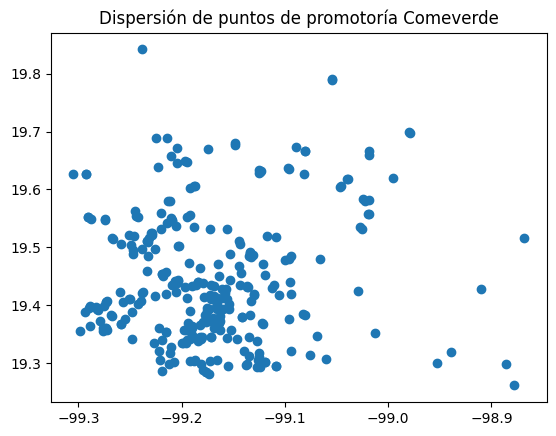

In [6]:
plt.scatter(tiendas[:,0], tiendas[:,1])
plt.title("Dispersión de puntos de promotoría Comeverde")

#### Clustering
Empezaremos creando un array de numpy con las coordenadas de cada tienda, de tal forma que cada dirección es una lista de python

métodos de clustering

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Diferentes métodos de clustering que usaremos
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

#Métricas para evaluar los clusterings
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Función para calcular distancias
from sklearn.metrics import pairwise_distances
#Función para graficar los puntos
def plot_data(points, labels, title):
    fig = plt.figure()
    plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)

    plt.show()


#Base de datos para pruebas
points = tiendas


####Método de K-Means
Con este método buscaremos formar agrupamientos de tiendas de 25 tiendas por grupo, por esto definimos que el número de clusters a generar sean 13

In [8]:
kmeans = KMeans(n_clusters=13).fit(points);
clustering_labels = kmeans.labels_;
centers = kmeans.cluster_centers_;
d_KM = pd.DataFrame(
    {'K-means':clustering_labels}
)
df['K-means']=d_KM['K-means']


Grupo asignado a cada tienda con K-means

In [9]:
print('Labels: ', clustering_labels)

Labels:  [ 1  1  9  2 10  9  0  0  9 11  6  5  2 10  4  1  1 12  1 10  1  2 10 10
  2  2  2 11  6  5  0  3 12 11  2  3 11 11 10  5 11  2  2  5 11 10  6  1
  5  3  1  0  6  2  5  7 10 10 12  4  6  1  6 10  3 10  6  1  1  7  9  9
  1  1  6  9  2  0  2 10  2  9 10  0  2  1  9  4  0 12 10  2  6  6 10  4
 12  2 11  9  1  3 11  1 10 11  6  4 10  6  9  9  5  6  1  3  7  2 12  1
 12  8  1  1  5  2  1  0  1  6  1  6  0  2  9  2 12  6  4 10 10  3 11  1
  0  0  2  3  5  1  8  2  7  4 12  5  4  1 11  2  2  8  7  6  3 11  2 11
  3  3 10  0  5  6  9  5  3  9  1  1 11  1  1  9  4  4 10  6  7  9  5  1
  8  1  1  1  4  2  2  0  5 10  4  1  0 11  2  6 10 11  5  5  2 10  6  3
 10  6  1 10  5 10 10  9 10  1  1  1  1  6  1  1  0  2  9  9 10  1  9  9
 10  2  2  6  4  0  9  0 12  5  0  2  3  3  8 12  9  6  9 12  9  6  0  9
 11  9 10  6  5  2  1  2  9  2 11  1  6  5  1  9  5  2  6  1  9 10  2  2
  5  6  6  9  1  6  2 11  3  0 10  8  6  9]


Centroides calculados por K-means

In [10]:
print('Centers: ', centers)

Centers:  [[-99.12933958  19.49161667]
 [-99.16669795  19.37673558]
 [-99.23475683  19.53025428]
 [-99.22144418  19.65577484]
 [-99.01457984  19.57759255]
 [-99.11789611  19.31001863]
 [-99.26993027  19.38475622]
 [-99.01728937  19.71682083]
 [-98.92976913  19.32680368]
 [-99.19661626  19.32096825]
 [-99.19879557  19.43754773]
 [-99.11683712  19.42180507]
 [-99.10991789  19.64889107]]


Clusters sugeridos por K-means

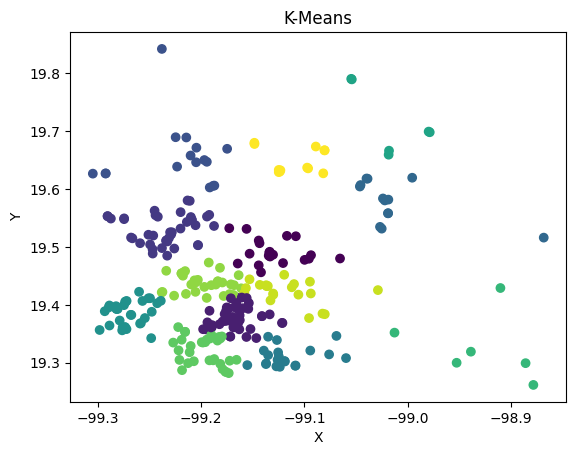

In [11]:
plot_data(points, clustering_labels, 'K-Means')

Conteo de tiendas por grupo

In [12]:
pd.Series(clustering_labels).value_counts()

1     48
2     40
10    34
6     33
9     32
5     22
0     20
11    20
3     16
4     13
12    12
7      6
8      6
Name: count, dtype: int64

Aquí podemos observar que el número de elementos por grupo no es consistente, esto debido a que existen muchas tiendas concentradas y grupos de menos tiendas más alejados del centro. Como necesitamos que el número de elementos por grupo sea 25, recurriremos a un método especial de K-Means

###Método de K-Means Constrained
descargamos la libreria

In [13]:
pip install k-means-constrained;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.1 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.2

Método de K-means constrained

In [14]:
from k_means_constrained import KMeansConstrained
clf = KMeansConstrained(
     n_clusters=13,
     size_min=2,
     size_max=25,
     random_state=0
)

df['Cons K-means'] = pd.Series(clf.fit_predict(points))

Grupo asignado a cada tienda

In [15]:
print('Labels\n', clf.labels_)

Labels
 [10 10  0 11  3  0  8  2 10  4  7  5 11  3  1 10  6  1 10  3  6  2  3  4
 11 11  2  4  3  5  8  9  9  4  2  9  8  4  3  5  4 11  2  5  4 11  3  6
  5  9 10  8  7 11  5  1 11  3  1  1  7 10  7  3  9  3  7  4  4  1  0  0
  6  6  3 10  2  8  2  3  2  0  4  8 11 10  0  1  8  1 11  2  7  7  4  1
  1  2  4  0  6  9  5  6  4  4  7  1  4  7  0  0  5  7  4  9  1 11  9  6
  9 12 10  6  5  2  4  8 10  7  4  7  8  2 10  2  1  7  1  3  3  9  5  6
  8  8 11  9  5 10 12  2  1  1  9  5 12  6  4 11  2 12  1  7  9  5  2  8
  9  9  3  8  5  7 10  5  9  0  6 10  8  6 10  0  1  1  4  7  1  0  5  6
 12  6  6  6  1  2 11  2  5  4  1  6  8  8 11  7 11  8  5  5  2  4  7  9
  3  7  6  4  5  3  3  0 11  6  6 10  6  7  4 10  8 11  0  0  3  5 10  0
  3  2  2  0  1  8 10  8  1  5  8  2  9  9 12  9 10  7  0  1  0  7  8 10
  8  0 11  7  5  2 10  2 10 11  4  6  3  5  6  0  5 11  3  6  0  3 11  2
  0  3  7  0 10  3 11  8  9  8 11 12  7  0]


Centroides sugeridos

In [16]:
print('Cluster Center\n',clf.cluster_centers_)

Cluster Center
 [[-99.19729033  19.31124388]
 [-99.04294916  19.63325815]
 [-99.22601869  19.54701915]
 [-99.21915242  19.42523593]
 [-99.15734688  19.42411568]
 [-99.11373166  19.32050948]
 [-99.15985421  19.37983843]
 [-99.27650228  19.38021138]
 [-99.11691926  19.47156804]
 [-99.20063712  19.6543493 ]
 [-99.18593503  19.35675492]
 [-99.23119679  19.49226931]
 [-98.920986    19.35382163]]


Conteo de tiendas por cluster

In [17]:
print('Size of clusters\n', pd.Series(clf.labels_).value_counts())

Size of clusters
 10    25
0     25
3     25
8     25
2     25
4     25
7     25
5     25
1     25
6     25
11    24
9     21
12     7
Name: count, dtype: int64


Graficación de clusters

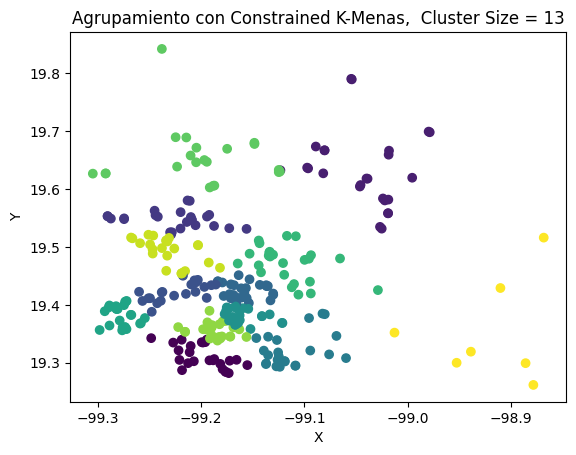

In [18]:
plot_data(points, clf.labels_, 'Agrupamiento con Constrained K-Menas,  Cluster Size = 13')

De nuevo podemos ver que el agrupamiento sigue generando clusters pequeños distantes a la mayoría de puntos. Lo importante es que tenemos un máximo de 25 elementos por cluster y con esto será más facil trabajar.  

Dataframe con agrupamientos

In [19]:
df

,Tienda,ID,Long,Lat,K-means,Cons K-means
0,LA COMER SUMESA CENTENARIO,0,-99.163037,19.357660,1,10
1,NUTRISA PORTAL SAN ANGEL,1,-99.189762,19.361090,1,10
2,NUTRISA CHED PICACHO,2,-99.218491,19.287171,9,0
3,NUTRISA SATELITE 2,3,-99.233881,19.510400,2,11
4,NUTRISA CHED POLANCO,4,-99.206436,19.442178,10,3
...,...,...,...,...,...,...
297,CHEDRAUI 174 CHEDRAUI SELECTO MEXICO FORTUNA 0...,299,-99.133259,19.483287,0,8
298,CHEDRAUI 106 CHEDRAUI SELECTO MEXICO TOREO 04-15,300,-99.219046,19.454090,10,11
299,WALMART 1202 SC HORIZONTE,301,-98.952629,19.299920,8,12
300,WALMART 1118 WE CENTRAL INTERLOMAS,302,-99.280851,19.392725,6,7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tienda        302 non-null    object 
 1    ID           302 non-null    int64  
 2    Long         302 non-null    float64
 3    Lat          302 non-null    float64
 4   K-means       302 non-null    int32  
 5   Cons K-means  302 non-null    int32  
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 11.9+ KB


Exportar archivos

In [21]:
for i in range(13):
  df_ac = df.loc[df["Cons K-means"] == i]
  filename = f'df_k-means_13c{i}.csv'
  # Export the DataFrame to a CSV file
  df_ac.to_csv(filename, index=False)